# 02450 Project 2


The primary goal of Project 2 is to apply supervised learning techniques (regression and classification) to predict properties or classifications of wood based on the cleaned and scaled dataset from Project 1.

In [149]:
import os
import numpy as np
import glob
import PIL.Image as Image
from tqdm.notebook import tqdm
import xlrd
import scipy
from scipy.linalg import svd

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

### Cleaned and Scaled Data from Project 1

In [150]:
# data = pd.read_csv('C:/Users/ongji/OneDrive/Documents/DTU/02450 Introduction to Machine Learning and Data Mining/02450-Project-1/usa_wood_data_formatted.csv')
# # print(data.head())  

# # Clean data by removing columns with a significant amount of missing values
# removed_columns = ['side_hardness','tension_perpendicular_to_grain','impact_bending']
# data_cleaned = data.drop(columns=removed_columns)
# data_cleaned = data_cleaned.dropna()
# # print(data_cleaned.isnull().sum()) # 0 means data is clean


# # Extract attribute names (1st row, column 0 to 13)
# attributeNames = data_cleaned.columns[:13]
# for i in range(len(attributeNames)):
#     print(i, attributeNames[i])

# # Extract class names to python list, then encode with integers (dict)
# classLabels = data_cleaned['classification'].values
# classNames = sorted(set(classLabels))
# classDict = {className: index for index, className in enumerate(classNames)}
# y = np.array([classDict[label] for label in classLabels])


# # Preallocate memory, then extract excel data to matrix X
# X = data_cleaned.iloc[:,0:13].values

# # Compute values of N, M and C.
# N = len(y   )
# M = len(attributeNames)
# C = len(classNames)


# # Filter out numerical values
# X_num = data_cleaned.iloc[:,6:].values



# # Scale and substract mean from data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_num)
# Y = X_scaled - np.ones((N, 1)) * X_scaled.mean(axis=0)

# # PCA by computing SVD of Y
# U, S, Vh = svd(Y, full_matrices=False)

# # Compute variance explained by principal components
# rho = (S * S) / (S * S).sum()

# # print("Singular values:", S)
# # print("Variance explained:", rho)
# # print("Cumulative variance explained:", np.cumsum(rho))

# # Convert arrays to PyTorch tensors
# X_tensor = torch.FloatTensor(X_scaled)
# y_tensor = torch.FloatTensor(y).unsqueeze(1)


In [151]:
# data = pd.read_csv('C:/Users/ongji/OneDrive/Documents/DTU/02450 Introduction to Machine Learning and Data Mining/02450-Project-1/usa_wood_data_formatted.csv')
# # print(data.head())  


# # Clean data by removing columns with a significant amount of missing values
# removed_columns = ['side_hardness','tension_perpendicular_to_grain','impact_bending']
# data_cleaned = data.drop(columns=removed_columns)
# data_cleaned = data_cleaned.dropna()

# # Select the target variable
# target_variable = 'modulus_of_rupture'
# y_target = data_cleaned[target_variable].values

# # drop target from dataset
# X = data_cleaned.drop(columns=[target_variable]) 

# # Keep Numerical Columns only
# X_num = X.iloc[:, 6:]  
# print(X_num.head())

# # # Extract attribute names (1st row, column 0 to 13)
# # attributeNames = data_cleaned.columns[:13]
# # for i in range(len(attributeNames)):
# #     print(i, attributeNames[i])


# # Scale and substract mean from data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_num)
# # y_target = scaler.fit_transform(y_target.reshape(-1, 1))
# #Y = X_scaled - np.ones((N, 1)) * X_scaled.mean(axis=0)

# # Update N after cleaning and target selection
# N = X_scaled.shape[0]

# # Convert arrays to PyTorch tensors
# X_tensor = torch.FloatTensor(X_scaled)
# y_tensor = torch.FloatTensor(y_target).unsqueeze(1)
# print("X_tensor:", X_tensor.shape)
# print("y_tensor:", y_tensor.shape)

In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('C:/Users/ongji/OneDrive/Documents/DTU/02450 Introduction to Machine Learning and Data Mining/02450-Project-1/usa_wood_data_formatted.csv')

# Clean data
removed_columns = ['side_hardness','tension_perpendicular_to_grain','impact_bending']
data_cleaned = data.drop(columns=removed_columns).dropna()

# Select the target variable and features
target_variable = 'specific_gravity'
X = data_cleaned.drop(columns=[target_variable])
y = data_cleaned[target_variable].values

# Keep Numerical Columns only
X_num = X.iloc[:, 6:]  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Scale the features
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Scale the target
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1))

# Convert to PyTorch tensors if using PyTorch
import torch
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

# Now, proceed with your model training and evaluation


###  Two-Level Cross-Validation Model

K1 = outer loop

K2 = inner loop

h = no. of hidden neurons



In [153]:
# # ANN Model

# # Define variables
# K1 = 10
# K2 = 10

# class ANN(nn.Module):
#     def __init__(self, input_dim):
#         super(ANN, self).__init__()
#         self.layer1 = nn.Linear(input_dim, 128)
#         self.layer2 = nn.Linear(128, 256)
#         self.dropout = nn.Dropout(0.3)
#         self.layer3 = nn.Linear(256, 128)
#         self.layer4 = nn.Linear(128, 64)
#         self.output_layer = nn.Linear(64, 1)

#     def forward(self, x):
#         x = F.relu(self.layer1(x))
#         x = F.relu(self.layer2(x))
#         x = self.dropout(x)
#         x = F.relu(self.layer3(x))
#         x = F.relu(self.layer4(x))
#         x = self.output_layer(x)
#         return x
    

# # Cross-validation
# outer_cv = KFold(n_splits=K1, shuffle=True, random_state=42)
# inner_cv = KFold(n_splits=K2, shuffle=True, random_state=42)

# test_results =[]

# # Outer Loop
# for train_idx, test_idx in outer_cv.split(X_tensor):
#     X_train, X_test = X_tensor[train_idx], X_tensor[test_idx]
#     y_train, y_test = y_tensor[train_idx], y_tensor[test_idx]

#     best_model = None
#     lowest_loss = float('inf')

#     # Inner Loop
#     for train_idx_in, val_idx in inner_cv.split(X_train):
#         X_train_inner, X_val = X_train[train_idx_in], X_train[val_idx]
#         y_train_inner, y_val = y_train[train_idx_in], y_train[val_idx]

#         # Define the model and optimizer
#         model = ANN(X_train_inner.shape[1])
#         optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)  # L2 regularization
#         criterion = nn.MSELoss()
#         #scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
#         scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=10)


#         # Training phase
#         for epoch in range(100):
#             model.train()
#             optimizer.zero_grad()
#             outputs = model(X_train_inner)
#             loss = criterion(outputs, y_train_inner)
#             loss.backward()
#             optimizer.step()
#             scheduler.step(val_loss)

#             # Validation
#             model.eval()
#             with torch.no_grad():
#                 val_outputs = model(X_val)
#                 val_loss = criterion(val_outputs, y_val)

#             if val_loss < lowest_loss:
#                 best_model = model
#                 lowest_loss = val_loss

#     # Evaluation phase
#     best_model.eval()
#     with torch.no_grad():
#         test_outputs = best_model(X_test)
#         test_loss = criterion(test_outputs, y_test)
#         test_results.append(test_loss.item())

   
# for idx, error, in enumerate(test_results):
#     print(f"Fold {idx+1} MSE: {error}")


In [154]:
# ANN Model

# Define variables
K1 = 10
K2 = 10

class ANN(nn.Module):
    def __init__(self, input_dim, h):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(input_dim, h)
        self.layer2 = nn.Linear(h,h)
        self.output_layer = nn.Linear(h, 1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x
    
def cross_validation(X_tensor, y_tensor, K1=10, K2=10, h_range=20):

    outer_cv = KFold(n_splits=K1, shuffle=True, random_state=42)
    inner_cv = KFold(n_splits=K2, shuffle=True, random_state=42)

    test_results =[]
    inner_errors = []

    # Outer Loop
    for i, (train_idx, test_idx) in enumerate(outer_cv.split(X_tensor)):
        X_train, X_test = X_tensor[train_idx], X_tensor[test_idx]
        y_train, y_test = y_tensor[train_idx], y_tensor[test_idx]

        best_h = None
        #best_lambda = None
        best_model = None
        lowest_error = float('inf')

        # Inner Loop
        for h in range(1, h_range + 1): # onyl try up to 20 hidden neurons
            inner_errors_for_fold = []

            for train_idx_in, val_idx in inner_cv.split(X_train):
                X_train_inner, X_val = X_train[train_idx_in], X_train[val_idx]
                y_train_inner, y_val = y_train[train_idx_in], y_train[val_idx]

                # Define model based on h  
                model = ANN(X_train_inner.shape[1], h)
                optimizer = optim.Adam(model.parameters(), lr=0.01)
                criterion = nn.MSELoss()

                # Training phase
                for epoch in range(100):
                    model.train()
                    optimizer.zero_grad()
                    outputs = model(X_train_inner)
                    loss = criterion(outputs, y_train_inner)
                    loss.backward()
                    optimizer.step()
                

                # Evaluation phase
                model.eval()
                with torch.no_grad():
                    val_outputs = model(X_val)
                    #val_loss = criterion(val_outputs, y_val)
                    val_error = mean_squared_error(y_val.numpy(), val_outputs.numpy())
                    inner_errors_for_fold.append(val_error)
                
            
            # Find best h for this fold
            avg_inner_error = np.mean(inner_errors_for_fold)
            if avg_inner_error < lowest_error: 
                lowest_error = avg_inner_error
                best_h = h
                
                    

        # Evaluate the best model based on best h
        best_model = ANN(X_train.shape[1], best_h)
        optimizer = optim.Adam(best_model.parameters(), lr=0.001)
        criterion = nn.MSELoss()
        for epoch in range(100):
            best_model.train()
            optimizer.zero_grad()
            outputs = best_model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()

        best_model.eval()
        with torch.no_grad():
            test_outputs = best_model(X_test)
            test_error = mean_squared_error(y_test.numpy(), test_outputs.numpy())

        test_results.append((i+1, best_h, test_error))
    
    return test_results

In [155]:
results = cross_validation(X_train_tensor, y_train_tensor)
for result in results:
    print(f"Fold {result[0]} | Best h: {result[1]} | Test MSE: {result[2]:.4f}")


Fold 1 | Best h: 17 | Test MSE: 0.1636
Fold 2 | Best h: 17 | Test MSE: 0.2214
Fold 3 | Best h: 19 | Test MSE: 0.1568
Fold 4 | Best h: 18 | Test MSE: 0.3320
Fold 5 | Best h: 20 | Test MSE: 0.1680
Fold 6 | Best h: 14 | Test MSE: 0.5020
Fold 7 | Best h: 13 | Test MSE: 0.2815
Fold 8 | Best h: 20 | Test MSE: 0.1481
Fold 9 | Best h: 19 | Test MSE: 0.2173
Fold 10 | Best h: 17 | Test MSE: 0.2406


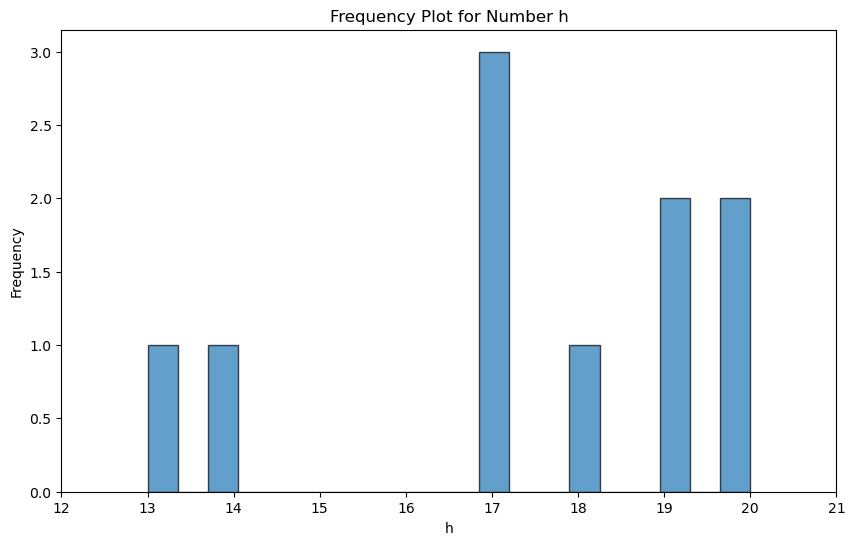

In [159]:
# Extract the h values from the results
h_values = [result[1] for result in results]


# Plot the histogram for the frequency plot of h
plt.figure(figsize=(10, 6))
plt.hist(h_values, bins=20, edgecolor='black', alpha=0.7)
plt.xticks(range(int(min(h_values))-1, int(max(h_values))+2, 1))
plt.xlabel('h')
plt.ylabel('Frequency')
plt.title('Frequency Plot for Number h')
plt.show()

In [ ]:
# Train the final model using the best h on the entire training data
best_h = max(set([result[1] for result in results]), key=[result[1] for result in results].count)
final_model = ANN(X_train_tensor.shape[1], best_h)
optimizer = optim.Adam(final_model.parameters(), lr=0.001)
criterion = nn.MSELoss()

for epoch in range(100):  # More epochs since we are now training on the full dataset
    final_model.train()
    optimizer.zero_grad()
    outputs = final_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate on the test data
final_model.eval()
with torch.no_grad():
    test_outputs = final_model(X_test_tensor)
    test_error = mean_squared_error(y_test_tensor.numpy(), test_outputs.numpy())
    print(f"Test MSE: {test_error:.4f}")

Test MSE: 0.2276


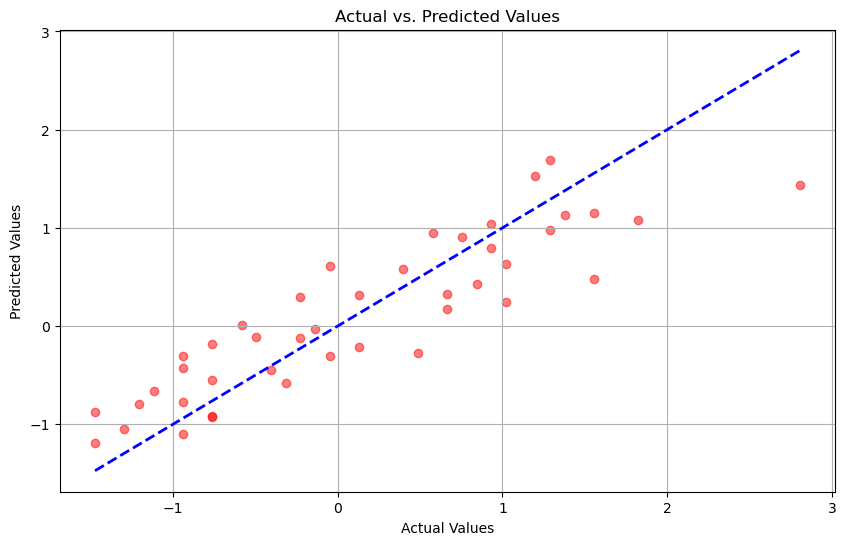

In [176]:
import matplotlib.pyplot as plt

# Assume you have already these tensors:
# y_test_tensor: actual target values in the test set
# test_outputs: model's predictions on the test set

# Convert tensors to numpy arrays for plotting if they aren't already
actual = y_test_tensor.numpy().flatten()  # Flatten to ensure it's a 1D array
predicted = test_outputs.numpy().flatten()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual, predicted, alpha=0.5, color='red')  # you can adjust alpha for point transparency
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Draw a line of perfect predictions
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'blue', lw=2, linestyle='--')
plt.grid(True)

plt.show()
